# Experimental Background

# Time-Course Monitoring of the PAD-Catalyzed Decarboxylation of *p*-Coumaric Acid Using HPLC-UV Analysis

In subproject SP7, the acquisition and analysis of time-course data are fundamental to understanding enzyme kinetics and evaluating reaction efficiency. In particular, chromatic (UV-visible absorbance) data obtained through high-performance liquid chromatography (HPLC) are utilized to quantify substrate depletion and product formation over time.

## Analytical Methodology

All chromatographic measurements were performed using an **Agilent 1100 HPLC system** equipped with a diode array detector (DAD). This setup allows for simultaneous monitoring of multiple wavelengths, enabling detection of both the substrate and the product in the same chromatographic run. The reaction under investigation involves the enzymatic decarboxylation of *p*-coumaric acid, catalyzed by **Phenolic Acid Decarboxylase (PAD)**, yielding vinylphenol and carbon dioxide:

C9H8O3 ──(PAD)──► C8H8O + CO2


- **Substrate:** *p*-Coumaric acid (4-hydroxycinnamic acid)  
- **Product:** Vinylphenol (4-vinylphenol)

This biotransformation is a common model reaction in enzymatic decarboxylation studies, given its relevance in microbial metabolism of plant-derived phenolic acids.

## Calibration and Detection Parameters

To enable quantification, calibration curves for *p*-coumaric acid were established using standard solutions at concentrations of **2 mM**, **4 mM**, and **10 mM**. These were measured by their UV absorption characteristics under identical HPLC conditions to those used for the enzymatic reaction samples.

- *p*-Coumaric acid:
  - **λmax:** 282 nm  
  - **Retention time:** ~1.5 min

- Vinylphenol:
  - **λmax:** 237 nm  
  - **Retention time:** ~4.9 min


## Experimental Setup for Time-Course Measurement

The enzymatic reaction was initiated with an initial substrate concentration of **30 mM *p*-coumaric acid** in solution. The reaction mixture also contained **38.8 mg/mL of PAD enzyme**, assumed to be active under the experimental conditions.

**Your info here**: (Buffer composition, pH, temperature, total reaction volume, and mixing conditions are required to accurately interpret the kinetic data and assess reaction robustness.)

Samples were withdrawn at predefined time points:

0, 15, 30, 60, 120, and 240 minutes

At each time point, aliquots were taken and analyzed via HPLC to monitor changes in substrate and product concentration over time.

**Your info here**: (Clarification is needed on whether enzymatic reactions were quenched—e.g., by acidification or heat denaturation—prior to injection into the HPLC system.)

This time-course dataset enables the construction of concentration-vs-time plots for both substrate depletion and product accumulation, which are critical for subsequent kinetic modeling. Through such analysis, initial reaction velocities, turnover numbers, and potential substrate inhibition or enzyme deactivation phenomena can be identified.



### Import the needed packages

In [4]:
# First make sure chromatopy is installed:
# pip install git+https://github.com/FAIRChemistry/chromatopy.git

# Then try importing:
try:
    from chromatopy import ChromAnalyzer
    from chromatopy.units import *
    import chromatopy as cp
    from chromatopy.tools.utility import visualize_enzymeml 
    from chromatopy.ioutils.enzymeml import to_enzymeml
    from pyenzyme import EnzymeMLDocument
except ImportError as e:
    print(f"Error importing chromatopy: {e}")
    print("Make sure chromatopy is installed correctly with: pip install git+https://github.com/FAIRChemistry/chromatopy.git")

/tmp/ipykernel_2539618/540365121.py:7: UserWarning: Importing units from `predefined.units` is discouraged. Use strings like 'mmol / l', 's', etc. instead.
  from chromatopy.units import *


### 1. First set up the path of your data:
You can right click on you folder and click "Copy Path"

In [5]:
# define directory with calibration data
dir_cal_substrate = "calibration/p_courmaric"

### 2. Add Calibration

Let's begin by creating a calibration. Therefore we read in the calibration data. Depending in what format/from what machine your calibration Data are coming the method looks slightly different.
We do this by instantialting a ```ChromAnalyzer``` Object though the Method .read_csv. If your calibration Data are in a different format the Method could also be ```.read_asm```, ```read_chromeleon```, ```read_thermo```, ```read_agilent```, etc.

##### Furthermore we have to specify additional parameters for the method:
1. ```path```:  Path to the directory in which your files are placed. Try to order them Alphabetically! In our case we have 3 files containing Measurements of 2mM, 4mM and 10mM of Substrate
2. ```ph``` : pH of Measurement
3. ```temperature``` : Experimental Tempertaure 
4. ```temperature_unit:``` Celsius -> "C"
5. ```values```: In this case these are the concentration of each file. Since we have 3 files of different conditions, this list hast to have 3 values: [2, 4, 10]
6. ```unit```: Unit of used concentration:
7. ```mode```: Depending if your measurement is a "calibration" or "time-course".
8. ```retention_time_col_name```: The CSV has different columns. write the name of the column of the retentiontime
9. ```peak_area_col_name```: Here you should write the column name of the area.

In [6]:
# read calibration data
calibration_p_coumaric = ChromAnalyzer.read_csv(
    path=dir_cal_substrate,
    ph=7.4,
    temperature=25,
    temperature_unit="C",
    values=[2, 4, 10],
    unit="mmol/ml",
    mode="calibration",
    retention_time_col_name="RetTime",
    peak_area_col_name="Area",
)

### 3. In the next step we define the molecules of this Measurement:

We define the molecoles of our "calibration_p_coumaric" ```ChromAnalyzer``` Object. Therefore we call the function ```.define_molecule()``` on the Object.
We define Molecules with:
- ```id``` = Our chosen ID of the Molecule. Remember it, because we need it later.
- ```pubchem_cid``` = The Pubchem id is important. We fetch the info like its common name from the Database and assign it to the data.
- ```retention_time```= Where do you expect the peak of your Molecule. Whats your retention time.
- ```retention_tolerance``` = Here you define the time you expect your  molecule to become visable to the detector
- ```wavelength``` = At which Wavelength is you Molecule Measured

In [7]:

# define 
mol_PCA = calibration_p_coumaric.define_molecule(
    id="PCA",
    name="p-coumaric acid",
    pubchem_cid="-1",
    retention_time=1.5,
    retention_tolerance=0.2,
    wavelength=282
)

🎯 Assigned p-coumaric acid to 3 peaks


### Here we want to Visualize our data and inspect, how good our regression fits to the data.
We call the ```add_standard()``` Function.
- With ```molecule``` we specify what molecule we want to Vizuallize
- With ```vizualize``` = True or False we turn on/off the visualization

✅ Models have been successfully fitted.


                                      Model Overview                                      
┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Name ┃ AIC ┃ R squared ┃ RMSD    ┃ Equation ┃ Relative Parameter Standard Errors ┃
┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ linear     │ 20  │ 0.9988    │ 19.0725 │ PCA * a  │ a: 1.3%,                           │
└────────────┴─────┴───────────┴─────────┴──────────┴────────────────────────────────────┘

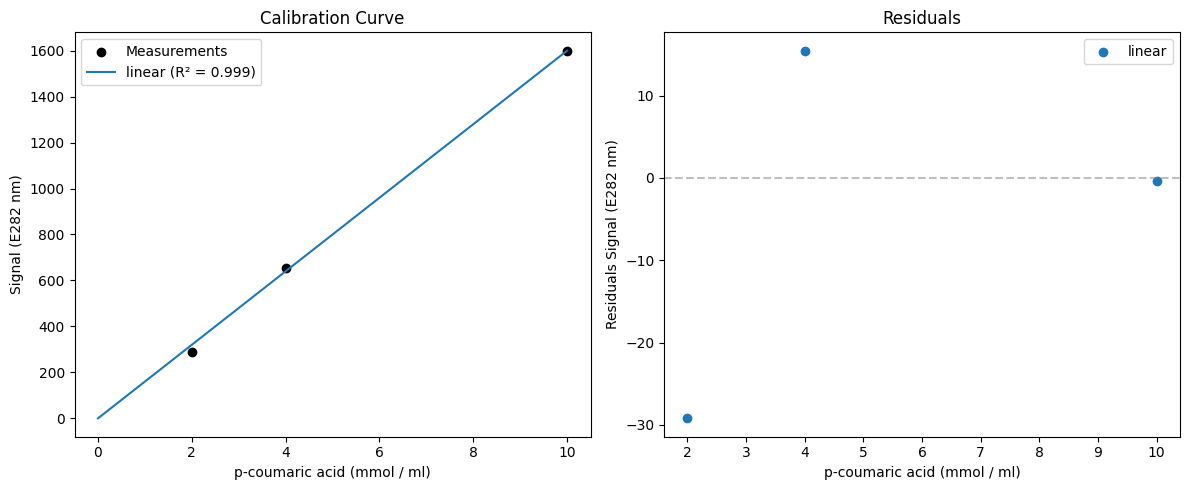

In [8]:
# fit  peaks to linear model
calibration_p_coumaric.add_standard(
    molecule=mol_PCA,
    visualize=True,
)

### Save for later yous

In [10]:
# save 
mol_PCA.save_json("calibration/PCA_Molecule_Data.json")

# Try it for Vinylphenol!!

### 1. First set up the path of your data:
You can right click on you folder and click "Copy Path"

In [11]:
dir_cal_product = ""

### 2. Add Calibration

Let's make a calibration for vinylphenol. Therefore we read in the calibration data. Depending in what format/from what machine your calibration Data are coming the method looks slightly different.
We do this by creating a ```ChromAnalyzer``` Object though the Method .read_csv. If your calibration Data are in a different format the Method could also be ```.read_asm```, ```read_chromeleon```, ```read_thermo```, ```read_agilent```, ```read_csv``` etc.

##### Furthermore we have to specify additional parameters for the method:
1. ```path```:  Path to the directory in which your files are placed. Try to order them Alphabetically! In our case we have 3 files containing Measurements of 2mM, 4mM and 10mM of Substrate
2. ```ph``` : pH of Measurement
3. ```temperature``` : Experimental Tempertaure 
4. ```temperature_unit:``` Celsius -> C
5. ```values```: In this case these are the concentration of each file. Since we have 3 files of different conditions, this list hast to have 3 values: [2, 4, 10]
6. ```unit```: Unit of used concentration:
7. ```mode```: Depending if your measurement is a "calibration" or "timecourse".
8. ```retention_time_col_name```: The CSV has different columns. write the name of the column of the retentiontime
9. ```peak_area_col_name```: Here you should write the column name of the area.

In [ ]:
# read calibration data
calibration_vinylphenol = 

### 3. In the next step we define the molecules of this Measurement:

We define the molecoles of our "calibration_vinylphenol" ```ChromanAnalyzer``` Object. Therefore we call the function ```.define_molecule()``` on the Object.
We define Molecules with:
- ```id``` = Our chosen ID of the Molecule. Remember it, because we need it later.
- ```pubchem_cid``` = The Pubchem id is important. We fetch the info like its common name from the Database and assign it to the data.
- ```retention_time```= Where do you expect the peak of your Molecule. Whats your retention time.
- ```retention_tolerance``` = Here you define the time you expect your  molecule to become visable to the detector
- ```wavelength``` = At which Wavelength is you Molecule Measured

In [ ]:
# define 
mol_vinylphenol = 

### Here we want to Visualize our data and inspect, how good our regression fits to the data.
We call the ```add_standard()``` Function.
- With ```molecule``` we specify what molecule we want to Vizuallize
- With ```vizualize``` = True or False we turn on/off the visualization

In [ ]:
# fit peaks to linear model
calibration_vinylphenol

# Timecourse Data

Now it's time to analyze your actual measurements (time course data)

### 2. Add Timecourse
Just as the calibration, the function calls the same function on the ChromAnalyzer object.
We do this by instantialting a CromeAnalyzer Object though the Method ```.read_csv``` ```.read_asm```, ```read_chromeleon```, ```read_thermo```, ```read_agilent```, etc.

##### Furthermore we have to specify additional parameters for the method:
1. ```path```:  Path to the directory in which your files are placed. Try to order them Alphabetically! In our case we have 3 files containing Measurements of 2mM, 4mM and 10mM of Substrate
2. ```ph``` : pH of Measurement
3. ```temperature``` : Experimental Tempertaure 
4. ```temperature_unit:``` Celsius -> C
5. ```values```: In this case these are the concentration of each file. Since we have 3 files of different conditions, this list hast to have 3 values: [2, 4, 10]
6. ```unit```: Unit of used concentration:
7. ```mode```: __This time use timecourse__

8. ```retention_time_col_name```: The CSV has different columns. write the name of the column of the retentiontime
9. ```peak_area_col_name```: Here you should write the column name of the area.

In [23]:

data_path = "measurement_data"
time_values = [0, 15, 30, 60, 120, 240]

time_course = ChromAnalyzer.read_csv(
    path=data_path,
    ph=7.4,
    temperature=25,
    temperature_unit="C",
    mode="timecourse",
    values=time_values,
    unit="minute",
    retention_time_col_name="RetTime",
    peak_area_col_name="Area"
)

In [24]:
from chromatopy import Molecule, to_enzymeml
PCA_path = "calibration/PCA_Molecule_Data.json"
mol_PCA = Molecule.read_json(PCA_path)

#Change for your actual experiment
#mol_PCA.retention_time = 1.5
#mol_PCA.retention_tolerance = 0.2

In [25]:
time_course.add_molecule(
    molecule=mol_PCA,
    init_conc=30,
    conc_unit="mmol/ml",
    retention_tolerance=0.1,
)


🎯 Assigned p-Coumaric acid to 6 peaks


### Try it for vinylphenol!

🎯 Assigned 4-Vinylphenol to 5 peaks


# Add the information of your protein/peptide to your measurement

In [28]:
time_course.define_protein(
    id="PAD",
    name="Phenolic acid decarboxylase",
    init_conc=38.8,
    conc_unit="mg/ml",
    sequence="BLADV",
    organism="Baci1",
    organism_tax_id="NCBI-TAXID",
    constant=True
)

## Set dilution factor, if you had to dilute for measurement
Here dilution was 1:10, so we set the factor to 10

In [45]:
time_course.set_dilution_factor(10) 

In [46]:
time_enzymeml = time_course.to_enzymeml(
    name="PCA_TimeCourse",
    calculate_concentration=True,
)


/tmp/ipykernel_3018/506263778.py:1: DeprecationWarning: The to_enzymeml method is deprecated and will be removed in version 1.0.0. Use chromatopy.ioutils.enzymeml.to_enzymeml instead.
  time_enzymeml = time_course.to_enzymeml(


### Visualize

In [71]:
#visualize_enzymeml(time_enzymeml)

### Save

In [33]:
# export data as EnzymeML Document
enzyme_ml = to_enzymeml(
    analyzers=[time_course],
    document_name="2025_05_20_PAD_Time_course",
    calculate_concentration=True,
    extrapolate=False,
)

# save EnzymeML Document to file
with open("enzymeML_documents/2025_05_20_PAD_Time_course.json", "w") as f:
    f.write(enzyme_ml.model_dump_json(indent=4))

### Two helper functions

In [48]:
import pandas as pd

# Your helper function
def get_time_and_data_by_species(doc, species_id):
    for measurement in doc.measurements:
        for data_entry in measurement.species_data:
            if data_entry.species_id == species_id:
                return data_entry.time, data_entry.data
    return [], []

def get_df_by_species(doc, species_id, column_name):
    time, data = get_time_and_data_by_species(doc, species_id)
    return pd.DataFrame({"Time (min)": time, column_name: data})

In [49]:
# Create individual dataframes
df_pca = get_df_by_species(time_enzymeml, "PCA", "PCA (mmol/ml)")
df_vp = get_df_by_species(time_enzymeml, "VINYLPHENOL", "4-Vinylphenol (mmol/ml)")
df_pad = get_df_by_species(time_enzymeml, "PAD", "PAD (mg/ml)")

# Merge on Time using outer join to keep all time points
df_combined = df_pca.merge(df_vp, on="Time (min)", how="outer")
df_combined = df_combined.merge(df_pad, on="Time (min)", how="outer")

# Sort by time just in case
df_combined = df_combined.sort_values("Time (min)")

# Export to Excel
df_combined.to_excel("enzyme_measurements.xlsx", index=False)

In [ ]:
print(df_combined["PCA (mmol/ml)"time_course.add_molecule(
    molecule=mol_vinylphenol,
    init_conc=0,
    conc_unit="mmol/ml",
    retention_tolerance=0.1,
)
])
print(df_combined["Time (min)"])

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

time_min = df_combined["Time (min)"].to_numpy()
substrate_data = df_combined["PCA (mmol/ml)"].to_numpy()
S0 = substrate_data[0]

# ODE: Michaelis-Menten
def mm_ode(t, S, Vmax, Km):
    return [-Vmax * S[0] / (Km + S[0])]

# Simuliere das Modell (auf Messzeitpunkten für Fitting)
def simulate_model(t_eval, Vmax, Km):
    sol = solve_ivp(mm_ode, (t_eval[0], t_eval[-1]), [S0],
                    t_eval=t_eval, args=(Vmax, Km), method='LSODA',
                    rtol=1e-8, atol=1e-10)
    return sol.y[0]

# Define residuals function for least squares fitting
def residuals(params):
    Vmax, Km = params
    S_sim = simulate_model(time_min, Vmax, Km)
    return S_sim - substrate_data

# Fit
initial_guess = [0.01, 10]
bounds = ([1e-6, 1e-3], [10, 1000])
result = least_squares(residuals, initial_guess, bounds=bounds)
Vmax_fit, Km_fit = result.x

# Glatte Kurve berechnen
time_fine = np.linspace(0, 240, 500)
S_fit_fine = simulate_model(time_fine, Vmax_fit, Km_fit)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time_min, substrate_data, 'o', label='Concentration p-coumaric acid')
plt.plot(time_fine, S_fit_fine, '-', label='Fitted Michaelis Menten')
plt.xlabel("Time (min)")
plt.ylabel("Substrate (mmol/ml)")
plt.title("Michaelis-Menten Fit (ODE)")
plt.legend()
plt.grid(True)
plt.show()

# Ergebnis
print(f"Vmax = {Vmax_fit:.6f} mmol/ml/min")
print(f"Km   = {Km_fit:.3f} mmol/ml")

### Calculate for example Kcat

In [ ]:
# kcat
enzyme_conc_mg_ml = 38.8
enzyme_mw_kDa = 57.52
enzyme_conc_mol_L = (enzyme_conc_mg_ml / 1000) / (enzyme_mw_kDa * 1000)
kcat = Vmax_fit / enzyme_conc_mol_L
print(f"Kcat for this enzyme is {kcat} 1/s")


# Global Fit of Michaelis-Menten Kinetics Using Triplicate Data

This script demonstrates how to simulate, fit, and visualize an enzyme kinetics experiment based on the **Michaelis-Menten equation**, using triplicate experimental data and parameter estimation with **confidence intervals**.



#Imports

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
```

We use common scientific libraries:

* `numpy`, `pandas` for data handling
* `matplotlib` for plotting
* `scipy` for solving differential equations and optimization



## Michaelis-Menten ODE

```python
def mm_ode(t, S, Vmax, Km):
    return [-Vmax * S[0] / (Km + S[0])]
```

This function defines the **Michaelis-Menten differential equation** describing how substrate concentration `S` changes over time.

* `Vmax`: maximum reaction rate
* `Km`: Michaelis constant

---

## Simulate Model

```python
def simulate_model(t_eval, S0, Vmax, Km):
    ...
```

Solves the ODE numerically over a time grid `t_eval`, starting from initial substrate concentration `S0`.

---

## Create Triplicate Data

```python
def create_triplicate_data():
    ...
```

This function simulates **3 experimental replicates**:

1. It adds **random noise** to simulate experimental variability.
2. Returns a list of DataFrames, one per replicate.

---

## Residual Function

```python
def global_residuals(params, replicates):
    ...
```

Defines the **difference between model and data** (residuals). This is minimized during the fitting process to find the best `Vmax` and `Km`.

---

## Fit Parameters Globally

```python
result = least_squares(...)
```

* Fits **all replicates simultaneously**.
* Uses nonlinear least squares optimization.
* Applies **bounds** to ensure realistic values.

Extracts:

* Fitted parameters: `Vmax_fit`, `Km_fit`
* **Covariance matrix** → used to estimate uncertainty in parameters
* 95% **confidence intervals**

---

## Confidence Interval Sampling

```python
param_samples = np.random.multivariate_normal(...)
```

* Samples 300 parameter combinations from a **multivariate normal distribution** based on the fitted parameter uncertainties.
* Simulates model curves for each sample to create a **confidence band**.

---

## Plotting Results

```python
plt.plot(...)
```

* Plots all 3 replicates as points.
* Shows the **best-fit curve**.
* Adds a **95% confidence band** around the fit.

---

## Final Output

```text
Global Fit:
Vmax = 0.020000 ± 0.001234 mmol/ml/min
Km   = 15.000 ± 0.678 mmol/ml
```

You get both parameter estimates and their uncertainties, visualized in the final plot.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

# ODE
def mm_ode(t, S, Vmax, Km):
    return [-Vmax * S[0] / (Km + S[0])]

def simulate_model(t_eval, S0, Vmax, Km):
    sol = solve_ivp(mm_ode, (t_eval[0], t_eval[-1]), [S0],
                    t_eval=t_eval, args=(Vmax, Km), method='LSODA',
                    rtol=1e-8, atol=1e-10)
    return sol.y[0]

# Triplikat-Daten
def create_triplicate_data():
    np.random.seed(42)
    time_min = np.array([0, 15, 30, 60, 120, 240])
    Vmax_true = 0.02
    Km_true = 15
    S0_true = 0.5

    dfs = []
    for i in range(3):
        clean = simulate_model(time_min, S0_true, Vmax_true, Km_true)
        noisy = clean + np.random.normal(0, 0.01, size=clean.shape)
        df = pd.DataFrame({
            "Time (min)": time_min,
            "PCA (mmol/ml)": noisy,
            "Replicate": f"R{i+1}"
        })
        dfs.append(df)
    return dfs

# Residuen
def global_residuals(params, replicates):
    Vmax, Km = params
    res = []
    for df in replicates:
        t = df["Time (min)"].to_numpy()
        y = df["PCA (mmol/ml)"].to_numpy()
        S0 = y[0]
        model = simulate_model(t, S0, Vmax, Km)
        res.append(model - y)
    return np.concatenate(res)

# Hauptteil
replicates = create_triplicate_data()
all_data = pd.concat(replicates, ignore_index=True)

# Fit
initial_guess = [0.01, 10]
bounds = ([1e-6, 1e-3], [10, 1000])
result = least_squares(global_residuals, initial_guess, bounds=bounds, args=(replicates,))
Vmax_fit, Km_fit = result.x

# Kovarianzmatrix und Unsicherheiten
J = result.jac
residuals = result.fun
n = len(residuals)
p = len(result.x)
residual_var = np.sum(residuals**2) / (n - p)
cov = residual_var * np.linalg.inv(J.T @ J)
se = np.sqrt(np.diag(cov))
ci_95 = 1.96 * se

print(f"Global Fit:")
print(f"Vmax = {Vmax_fit:.6f} ± {ci_95[0]:.6f} mmol/ml/min")
print(f"Km   = {Km_fit:.3f} ± {ci_95[1]:.3f} mmol/ml")

# Konfidenzbereich durch Parametersampling
N_samples = 300
param_samples = np.random.multivariate_normal([Vmax_fit, Km_fit], cov, N_samples)

# Simuliere Fit-Kurven
t_fine = np.linspace(0, 240, 300)
S0_mean = all_data.groupby("Replicate").first()["PCA (mmol/ml)"].mean()
S_bands = []

for Vmax_s, Km_s in param_samples:
    S_sample = simulate_model(t_fine, S0_mean, Vmax_s, Km_s)
    S_bands.append(S_sample)

S_bands = np.array(S_bands)
S_lower = np.percentile(S_bands, 2.5, axis=0)
S_upper = np.percentile(S_bands, 97.5, axis=0)
S_fit = simulate_model(t_fine, S0_mean, Vmax_fit, Km_fit)

# Plot alles zusammen
plt.figure(figsize=(8, 5))
for label, grp in all_data.groupby("Replicate"):
    plt.plot(grp["Time (min)"], grp["PCA (mmol/ml)"], 'o', label=label)

plt.plot(t_fine, S_fit, 'k-', lw=2, label='Globaler Fit')
plt.fill_between(t_fine, S_lower, S_upper, color='gray', alpha=0.3, label='95% Konfidenzband')

plt.xlabel("Zeit (min)")
plt.ylabel("PCA (mmol/ml)")
plt.title("Globaler Michaelis-Menten-Fit mit Konfidenzbereich (Triplikat)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
